In [1]:
import matplotlib.pyplot as plt
from scipy.io import wavfile
import pandas as pd
import numpy as np
import os
import pathlib
import sys

In [2]:
code_paths = {}
code_paths["repo_name"] = "p5-stress-classifier"

code_paths["repo_path"] = os.getcwd()
base_dir = os.path.basename(code_paths["repo_path"])
while base_dir != code_paths["repo_name"]:
    code_paths["repo_path"] = os.path.dirname(os.path.abspath(code_paths["repo_path"]))
    base_dir = os.path.basename(code_paths["repo_path"])

package_dir = pathlib.Path(code_paths["repo_path"], "src")
sys.path.append(str(package_dir))
from stresspred import (
    peak_time_to_rri,
    P5_StressDataLoader,
    timestamp_to_samp,
    resample_nonuniform,
    code_paths,
    timestamps_to_audacity_txt,
    find_files_with_string,
    get_camel_case
)

C:\Users\dbenesch\.conda\envs\stress-requirements\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [3]:
for path in code_paths["neurokit2_paths"]:
    sys.path.append(str(path))

In [4]:
from neurokit2 import signal_interpolate, find_outliers
import neurokit2 as nk

In [5]:
anno_dir = "v1"
anno_info_parent_path = pathlib.Path(r"Z:\Shared\Documents\RD\RD2\_AudioRD\datasets\Biosignals\CritiasStress\data_derivatives\Stage_ltallon\Task3\Task3 Complete")
anno_info_path = os.path.join(anno_parent_path, anno_dir)

NameError: name 'anno_parent_path' is not defined

In [ ]:
txt_file_paths = [os.path.join(anno_path, f) for f in os.listdir(anno_path) if ".txt" in f]

In [ ]:
txt_file_paths

In [ ]:
wav_file_paths = [os.path.join(anno_parent_path, f) for f in os.listdir(anno_parent_path) if ".wav" in f]

In [ ]:
from stresspred import get_frame_start_stop, get_frame, append_samples_to_wav
def clean_ppg(
    sig,
    sig_time=None,
    wav_path="out.wav",
    sampling_rate=1000,
    frame_len=np.inf,
    method="own_filt",
    show=False
):

    #sig = sig - np.nanmean(sig)
    #sig[np.isnan(sig)] = 0
    #sig = sig / np.max(np.abs(sig))
    in_start_stop, out_start_stop = get_frame_start_stop(sig_time, frame_len=frame_len)
    for frame_n in np.arange(1, len(in_start_stop) + 1):
        
        frame_sig = get_frame(sig, sig_time, in_start_stop, frame_n)
        frame_sig_time = get_frame(sig_time, sig_time, in_start_stop, frame_n)
        frame_sig_time_r = frame_sig_time
        if method=="own_filt":
            frame_sig_r = nk.signal_filter(
                frame_sig,
                sampling_rate=sampling_rate,
                lowcut=0.5,
                highcut=8,
            )
        else:
            frame_sig_r = nk.ppg_clean(frame_sig, sampling_rate=sampling_rate)
        out_frame_sig_r = get_frame(
            frame_sig_r, frame_sig_time_r, out_start_stop, frame_n
        )
        out_frame_sig_time_r = get_frame(
            frame_sig_time_r, frame_sig_time_r, out_start_stop, frame_n
        )
        if show:
            plt.figure(figsize=(15,3))
            plt.plot(frame_sig_time, frame_sig)
            plt.plot(frame_sig_time_r, frame_sig_r)
            plt.plot(out_frame_sig_time_r, out_frame_sig_r)
            plt.xlabel("Time (s)")
            plt.title("Frame " + str(frame_n))
            plt.legend(["Original input signal", "Processed input signal", "Output signal"])
            plt.show()
        if frame_n == 1:
            append_samples_to_wav(
                out_frame_sig_r, wav_path, sampling_rate, rewrite=True
            )
        else:
            append_samples_to_wav(
                out_frame_sig_r, wav_path, sampling_rate, rewrite=False
            )
    if frame_len == np.inf:
        out_frame_sig_r_time = get_frame(
            frame_sig_time_r, frame_sig_time_r, out_start_stop, frame_n
        )
        sig_info = {}
        sig_info["sig"] = out_frame_sig_r
        sig_info["time"] = out_frame_sig_r_time
        sig_info["sampling_rate"] = sampling_rate
        return sig_info

In [54]:
sig_name = "ieml"

"""
anno_parent_path = pathlib.Path(
    all_results_dict[sub_label][sig_name]["parent_path"]
).parent.parent
"""

anno_parent_paths = [d for d in anno_info_parent_path.parent.parent.glob("Task*") if d.is_dir()]
anno_parent_path = anno_parent_paths[2]
wav_file_paths = [
    os.path.join(anno_parent_path, f)
    for f in os.listdir(anno_parent_path)
    if ".wav" in f and get_camel_case(sig_name, first_upper=True) in f
]
file_path = wav_file_paths[0]
sub_label = pathlib.Path(file_path).stem.split("-")[1][:3]
print(sub_label)
loader = P5_StressDataLoader(sub_id=sub_label)
sig_info = loader.get_sig(sig_name, data_format="DB8k", file_path=file_path)

P03


In [55]:
wav_path = str(
    pathlib.Path(
        pathlib.Path(file_path).parent,
        pathlib.Path(file_path).stem.split("-Sig-")[0] + "-Sig-Clean.wav",
    )
)

In [56]:
ppg_cleaned_info = clean_ppg(
    sig=sig_info["sig"],
    sig_time=sig_info["time"],
    wav_path=wav_path,
    sampling_rate=sig_info["sampling_rate"],
    frame_len=180,
    show=False
)

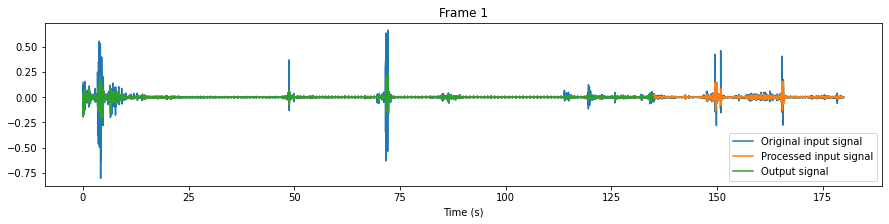

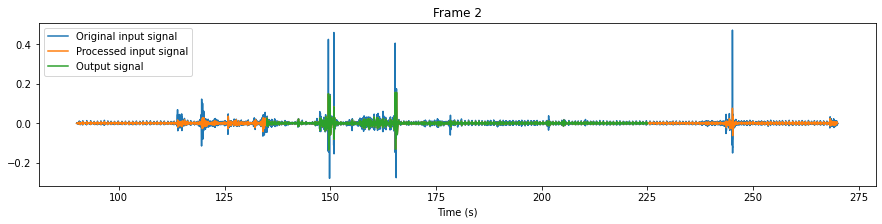

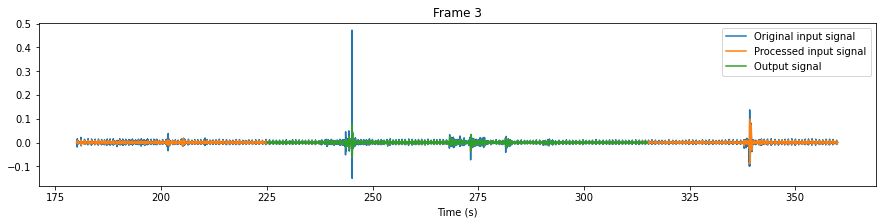

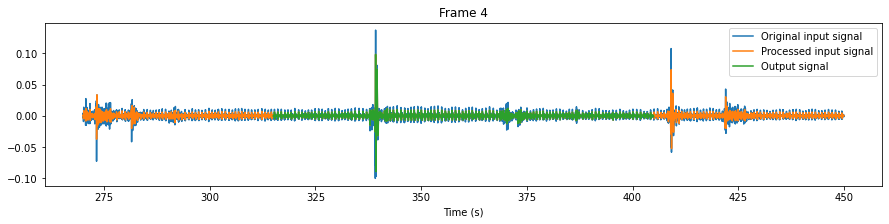

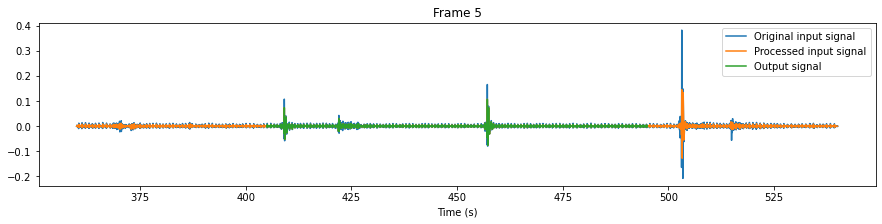

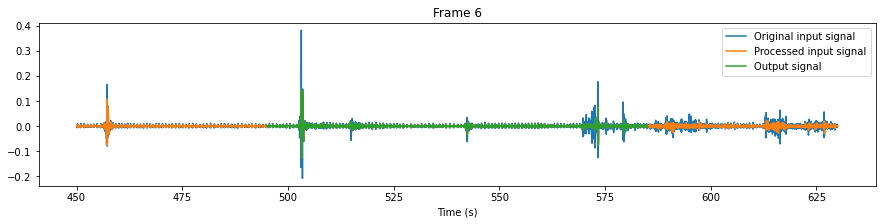

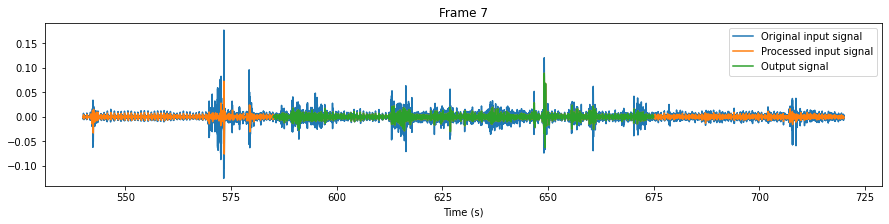

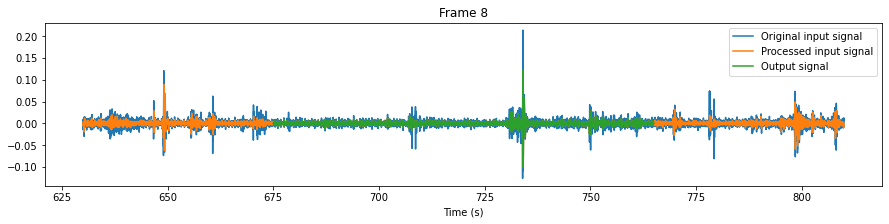

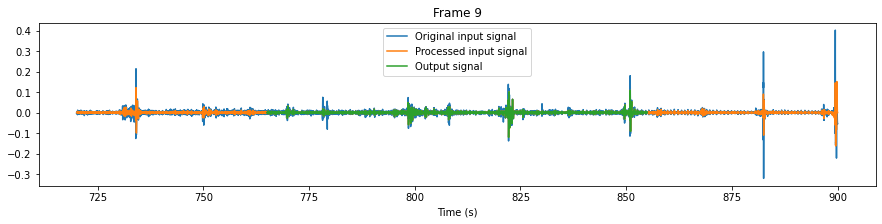

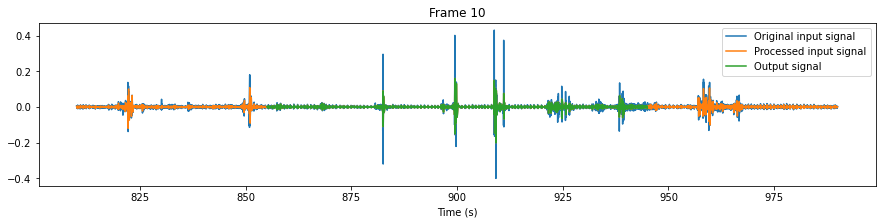

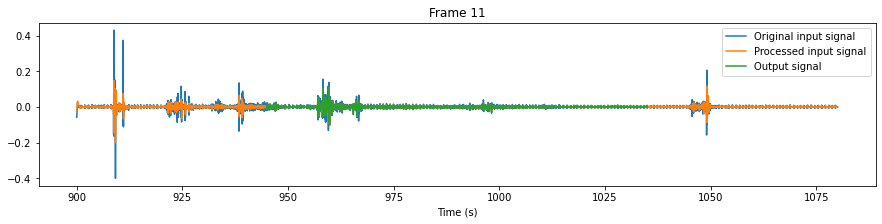

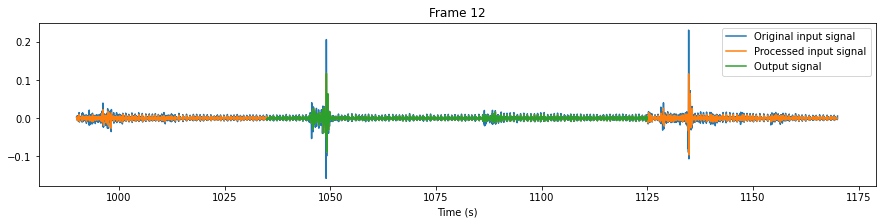

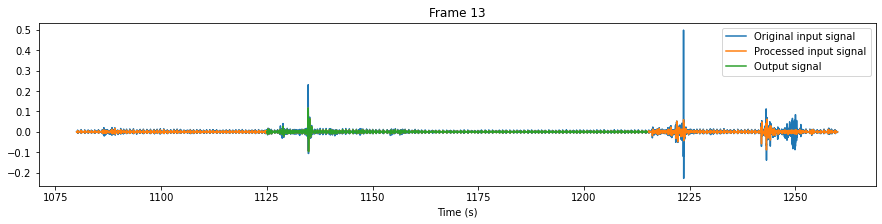

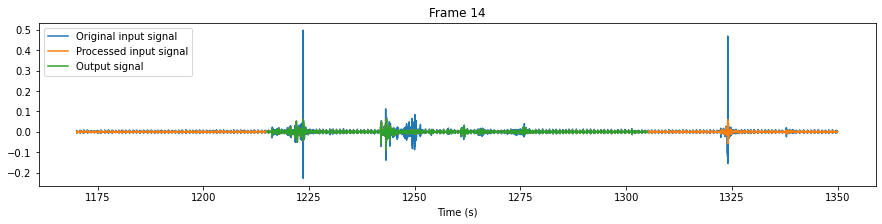

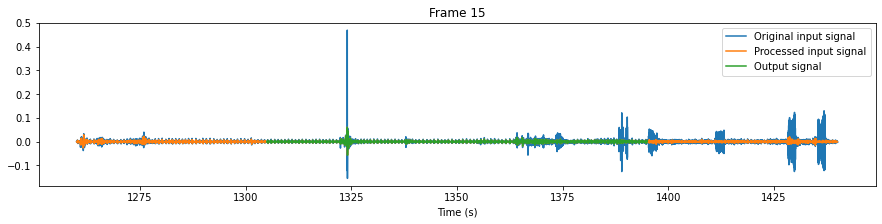

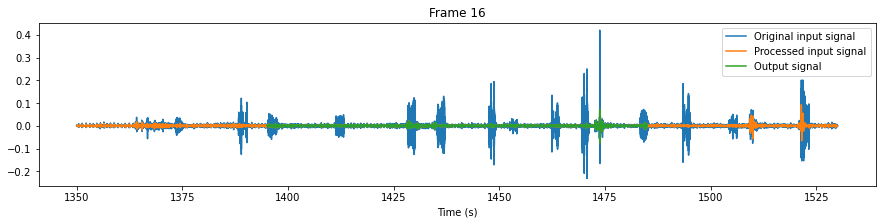

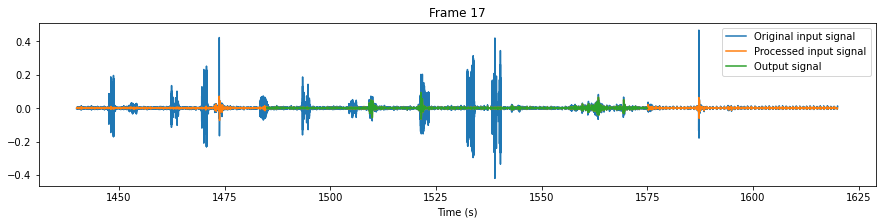

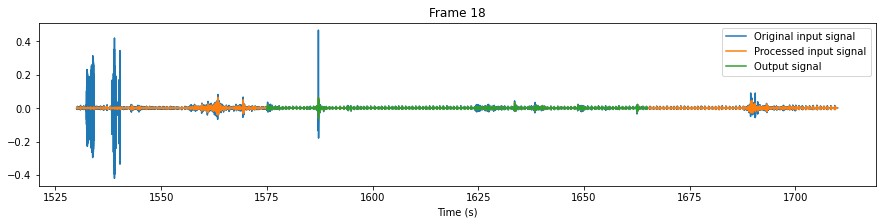

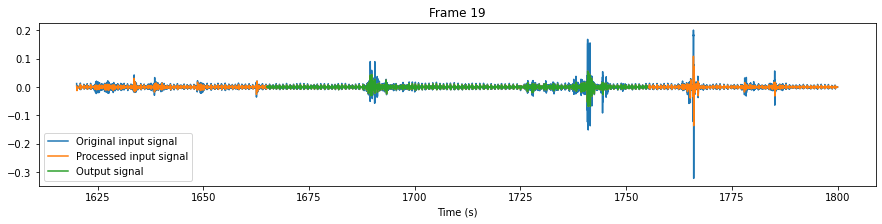

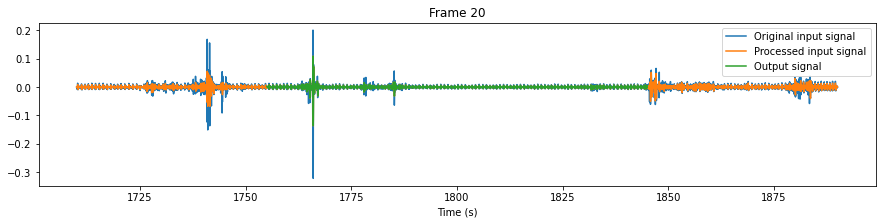

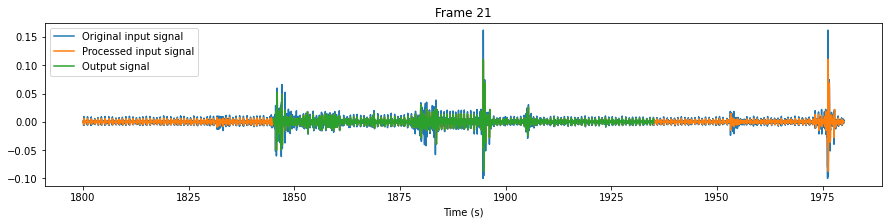

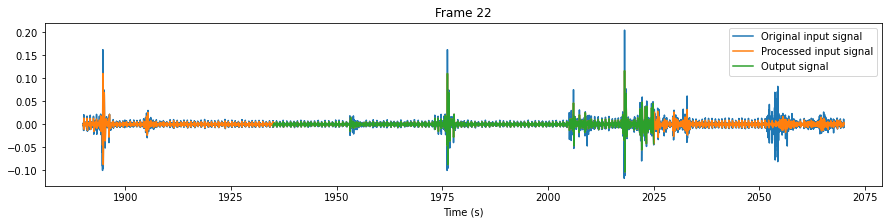

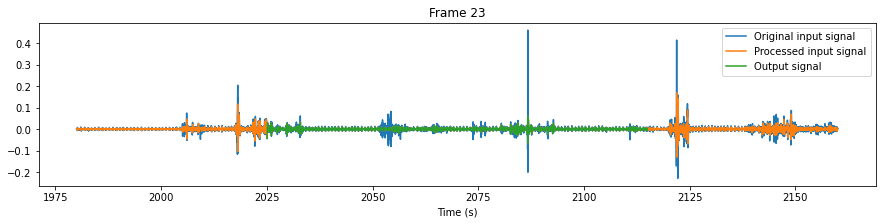

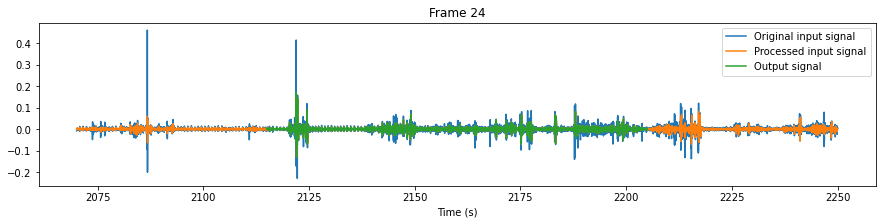

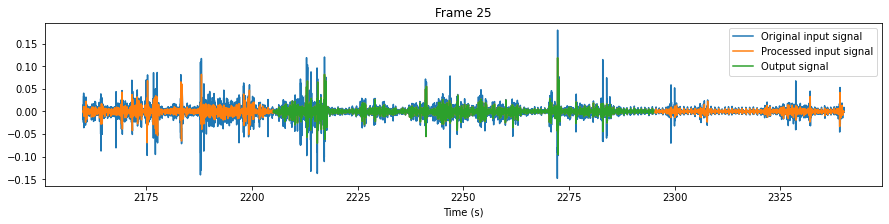

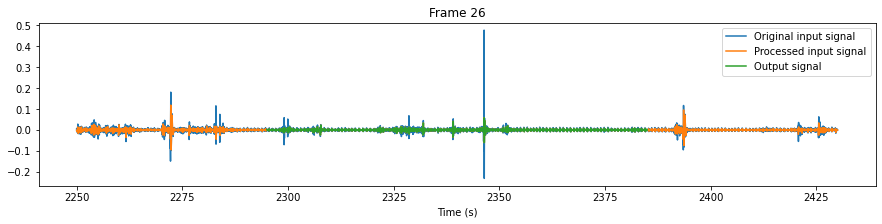

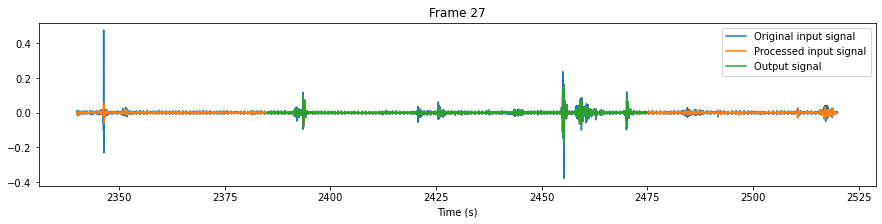

C:\Users\dbenesch\.conda\envs\stress-requirements\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


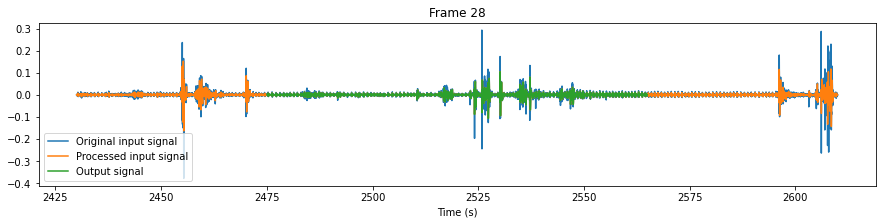

C:\Users\dbenesch\.conda\envs\stress-requirements\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


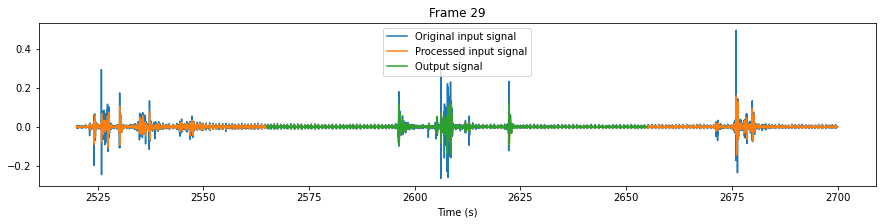

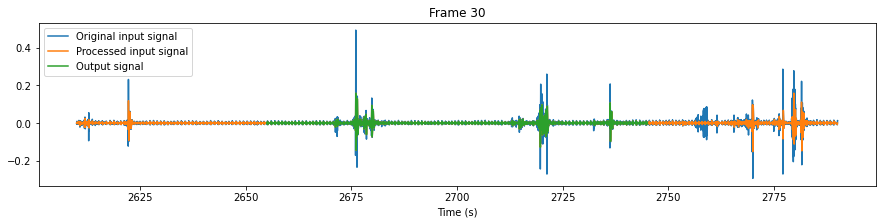

C:\Users\dbenesch\.conda\envs\stress-requirements\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


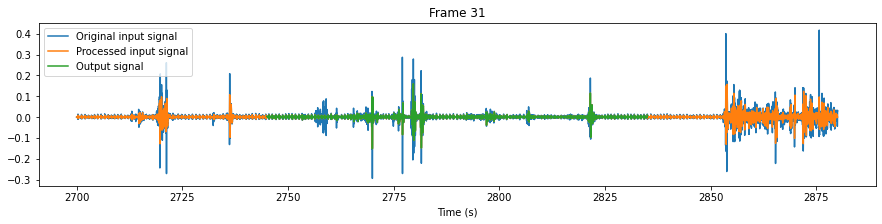

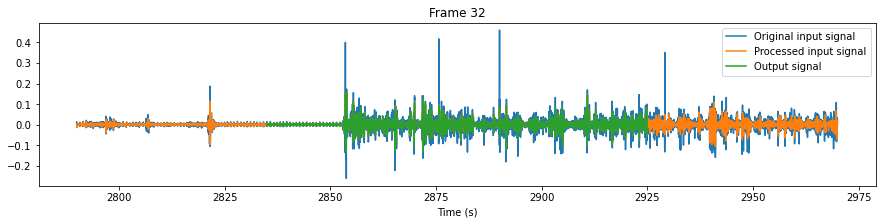

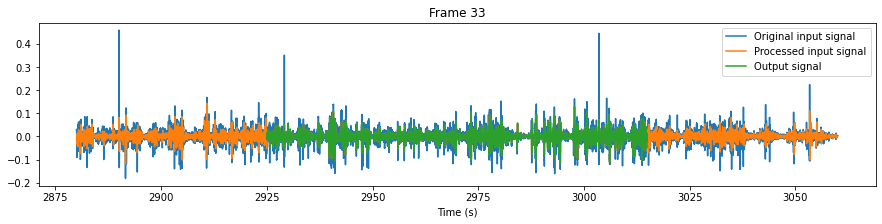

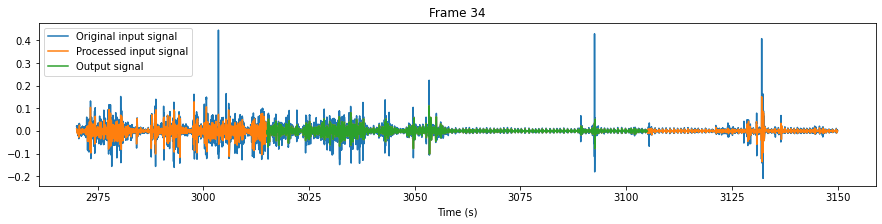

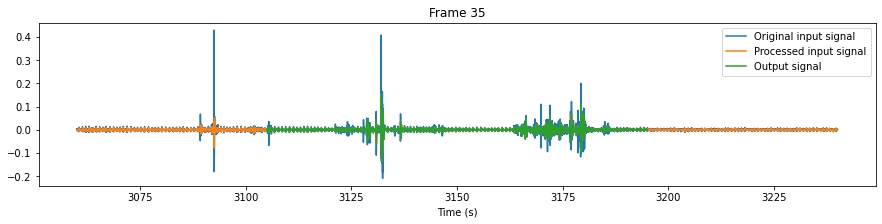

C:\Users\dbenesch\.conda\envs\stress-requirements\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


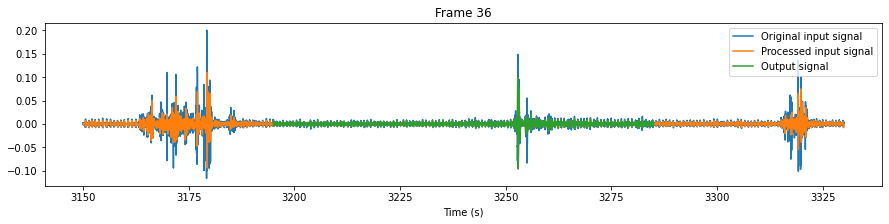

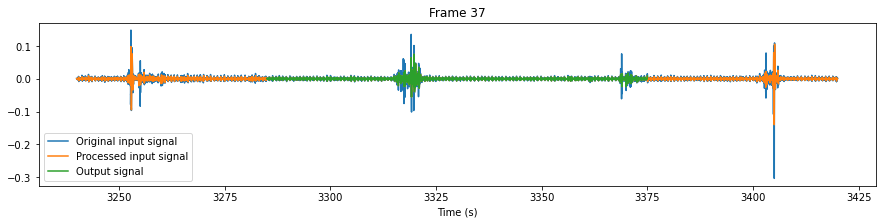

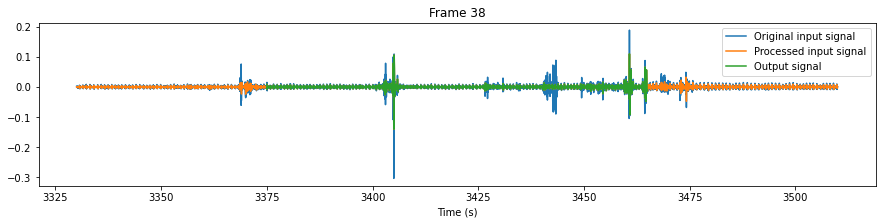

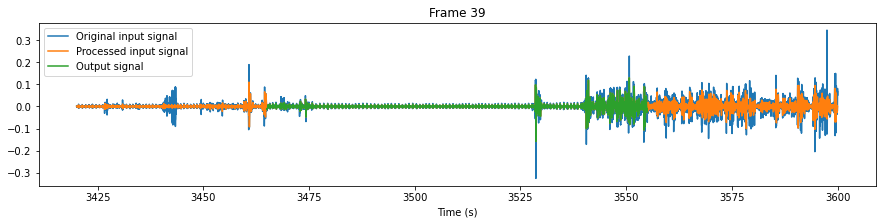

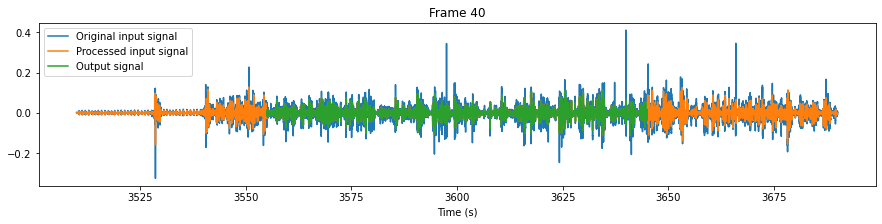

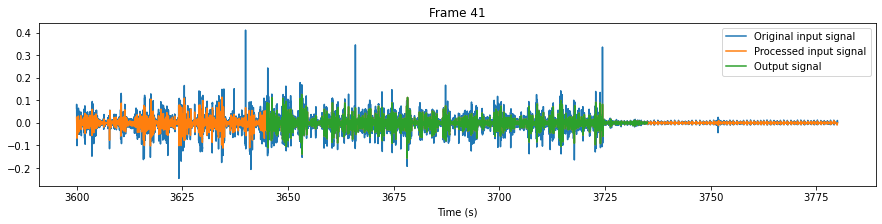

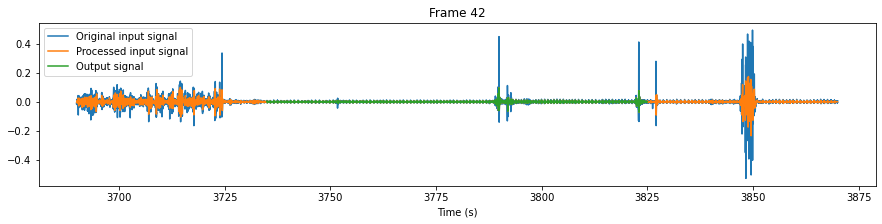

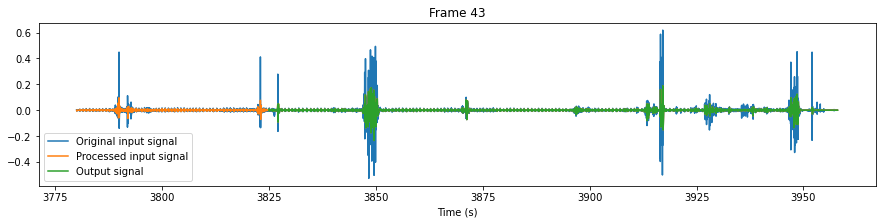

In [57]:
ppg_cleaned_info = clean_ppg(
    sig=sig_info["sig"],
    sig_time=sig_info["time"],
    wav_path=wav_path,
    sampling_rate=sig_info["sampling_rate"],
    frame_len=180,
    show=True
)

TypeError: can only concatenate list (not "Line2D") to list

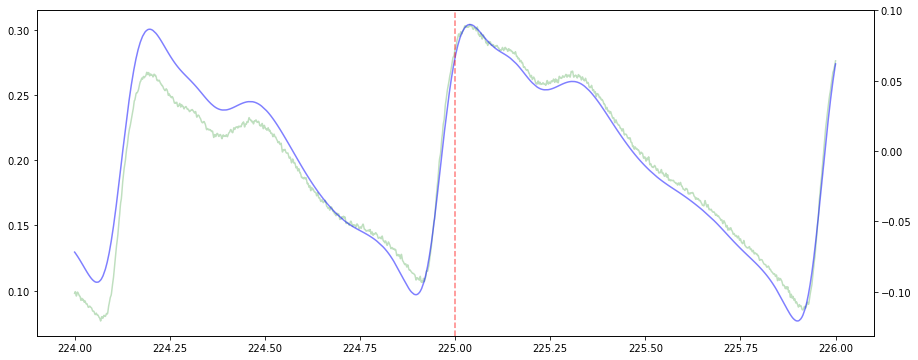

In [142]:
sub_label = "P06"

loader = P5_StressDataLoader(sub_id=sub_label)
sig_name = "ti_ppg"
st = 224
en = 226

ppg_cleaned_info = loader.get_sig(sig_name, file_path=wav_path, start_time=st, end_time=en)
ppg_orig_info = loader.get_sig(sig_name, file_path=file_path, start_time=st, end_time=en)
fig, (ax1) = plt.subplots(1, 1, figsize=(15, 6), sharex=True)
ppg_fs = ppg_cleaned_info["sampling_rate"]

ax2 = ax1.twinx()

lns1 = ax1.plot(
    ppg_orig_info["time"], ppg_orig_info["sig"],
    "g",
    alpha=0.25,
    label="Original input signal"
)
lns2 = ax2.plot(ppg_cleaned_info["time"], ppg_cleaned_info["sig"], "b", alpha=0.5, label="Output signal")
lns3 = plt.axvline(x=225, color='r', linestyle='--', alpha=0.5, label="Frame transition")
# added these three lines
lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)

ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Raw PPG", color="g")
ax2.set_ylabel("Clean PPG", color="b")
plt.title("Output signal with frames appended")

In [76]:

sig=sig_info["sig"]
sig_time=sig_info["time"]
sampling_rate=sig_info["sampling_rate"]
frame_len = 180
in_start_stop, out_start_stop = get_frame_start_stop(sig_time, frame_len=frame_len)
frame_n = 27
frame_sig = get_frame(sig, sig_time, in_start_stop, frame_n)
frame_sig_time = get_frame(sig_time, sig_time, in_start_stop, frame_n)
frame_sig_time_r = frame_sig_time
frame_sig_r = nk.signal_filter(
                frame_sig,
                sampling_rate=sampling_rate,
                lowcut=0.5,
                highcut=8.0,
            )

In [77]:
frame_sig_time_r

array([2340.      , 2340.000125, 2340.00025 , ..., 2519.999625,
       2519.99975 , 2519.999875])

(2460.0, 2470.0)

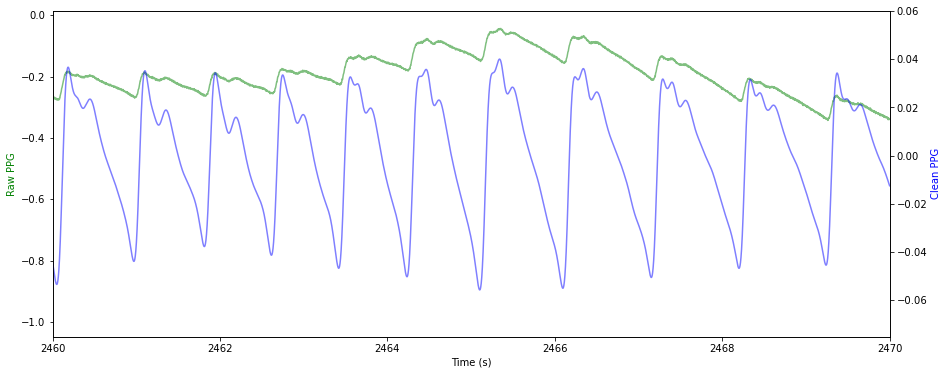

In [78]:
fig, (ax1) = plt.subplots(1, 1, figsize=(15, 6), sharex=True)
st = 2400
en = 2410
ppg_fs = clean_sig_info["sampling_rate"]

ax2 = ax1.twinx()

ax1.plot(
    frame_sig_time, frame_sig,
    "g",
    alpha=0.5,
)
ax2.plot(frame_sig_time_r, frame_sig_r, "b", alpha=0.5)

ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Raw PPG", color="g")
ax2.set_ylabel("Clean PPG", color="b")

plt.xlim([2460, 2470])

In [69]:
sub_label = "P06"

loader = P5_StressDataLoader(sub_id=sub_label)
sig_name = "ti_ppg"
clean_sig_info = loader.get_sig(sig_name, file_path=wav_path)

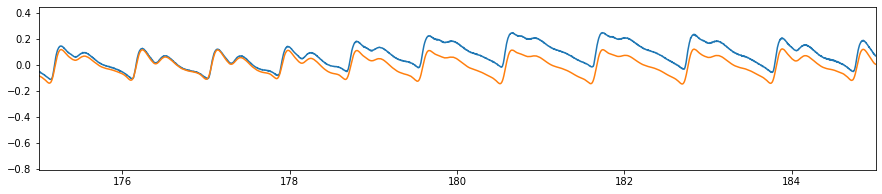

In [70]:
plt.figure(figsize=(15, 3))
# plt.plot(sig_info["time"], sig_info["sig"])
fs = clean_sig_info["sampling_rate"]
st = 0
en = 190
plt.plot(
    sig_info["time"][st * fs : en * fs], sig_info["sig"][st * fs : en * fs]
)

plt.plot(
    clean_sig_info["time"][st * fs : en * fs], clean_sig_info["sig"][st * fs : en * fs]
)
plt.xlim([175, 185])
plt.show()

Text(0, 0.5, 'Clean PPG')

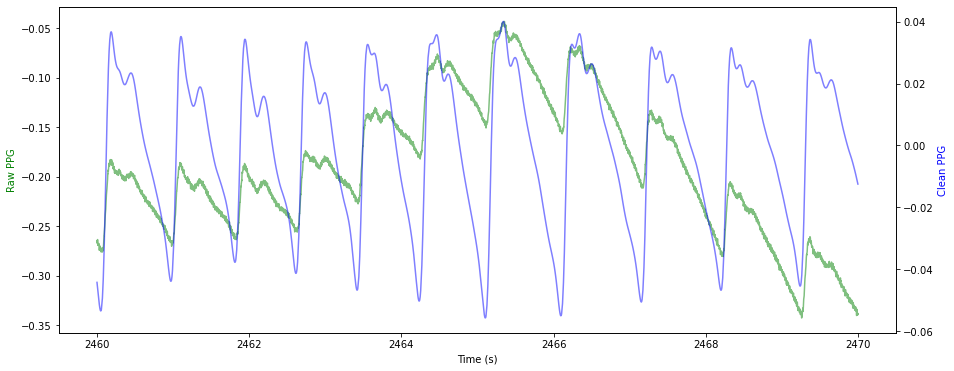

In [79]:
fig, (ax1) = plt.subplots(1, 1, figsize=(15, 6), sharex=True)
st = 2460
en = 2470
ppg_fs = clean_sig_info["sampling_rate"]

ax2 = ax1.twinx()

ax1.plot(
    sig_info["time"][st * ppg_fs : en * ppg_fs],
    sig_info["sig"][st * ppg_fs : en * ppg_fs],
    "g",
    alpha=0.5,
)
ax2.plot(clean_sig_info["time"][st * ppg_fs : en * ppg_fs],
    clean_sig_info["sig"][st * ppg_fs : en * ppg_fs], "b", alpha=0.5)

ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Raw PPG", color="g")
ax2.set_ylabel("Clean PPG", color="b")


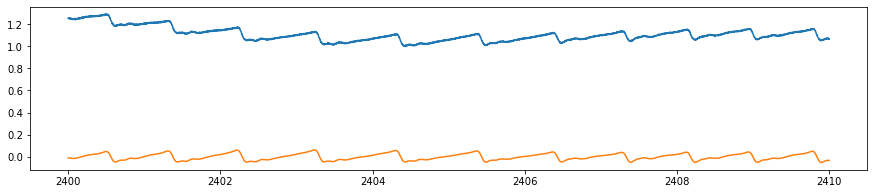

In [84]:
plt.figure(figsize=(15, 3))
# plt.plot(sig_info["time"], sig_info["sig"])
fs = clean_sig_info["sampling_rate"]
st = 2400
en = 2410
plt.plot(
    sig_info["time"][st * fs : en * fs], sig_info["sig"][st * fs : en * fs]/np.max(sig_info["sig"][st * fs : en * fs])
)

plt.plot(
    clean_sig_info["time"][st * fs : en * fs], clean_sig_info["sig"][st * fs : en * fs]/np.max()
)
plt.show()

In [61]:
ppg_cleaned = nk.ppg_clean(sig_info["sig"][st*fs:en*fs], sampling_rate=sig_info["sampling_rate"], method="nabian2018")

In [63]:
ppg_cleaned = nk.signal_filter(
    sig_info["sig"][st * fs : en * fs],
    sampling_rate=sig_info["sampling_rate"],
    lowcut=0.5,
    highcut=10,
)

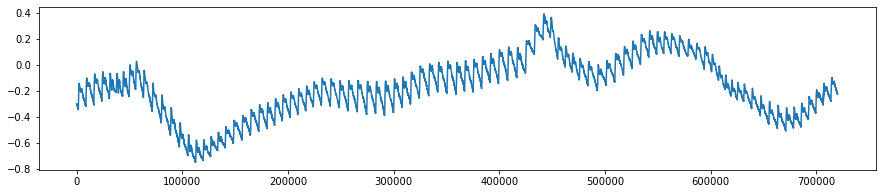

In [64]:
plt.figure(figsize=(15,3))
plt.plot(nk.as_vector(sig_info["sig"][st*fs:en*fs]))
plt.show()

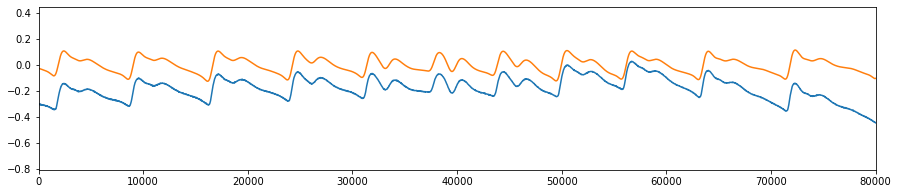

In [66]:
plt.figure(figsize=(15,3))
plt.plot(sig_info["sig"][st*fs:en*fs])
plt.plot(ppg_cleaned)
plt.xlim([0,fs*10])
plt.show()

In [41]:
ppg_signal = sig_info["sig"][st*fs:en*fs]
sampling_rate = sig_info["sampling_rate"]

In [81]:
filtered = nk.signal_filter(
        ppg_signal, sampling_rate=sampling_rate, lowcut=0.5, highcut=8, order=3, method="butter_ba"
    )

NameError: name 'ppg_signal' is not defined

NameError: name 'ppg_signal' is not defined

In [43]:
filtered

array([nan, nan, nan, ..., nan, nan, nan])

In [54]:
signal=ppg_signal

In [56]:
np.unique(np.isfinite(signal))

array([ True])

In [47]:
def _signal_filter_sanitize(lowcut=None, highcut=None, sampling_rate=1000, normalize=False):

    # Sanity checks
    if isinstance(highcut, int):
        if sampling_rate <= 2 * highcut:
            warn(
                "The sampling rate is too low. Sampling rate"
                " must exceed the Nyquist rate to avoid aliasing problem."
                f" In this analysis, the sampling rate has to be higher than {2 * highcut} Hz",
                category=NeuroKitWarning,
            )

    # Replace 0 by none
    if lowcut is not None and lowcut == 0:
        lowcut = None
    if highcut is not None and highcut == 0:
        highcut = None

    # Format
    if lowcut is not None and highcut is not None:
        if lowcut > highcut:
            filter_type = "bandstop"
        else:
            filter_type = "bandpass"
        freqs = [lowcut, highcut]
    elif lowcut is not None:
        freqs = [lowcut]
        filter_type = "highpass"
    elif highcut is not None:
        freqs = [highcut]
        filter_type = "lowpass"

    # Normalize frequency to Nyquist Frequency (Fs/2).
    # However, no need to normalize if `fs` argument is provided to the scipy filter
    if normalize is True:
        freqs = np.array(freqs) / (sampling_rate / 2)

    return freqs, filter_type

In [70]:
import scipy
lowcut=0.5
highcut=8
order=3
method="butter_ba"
freqs, filter_type = _signal_filter_sanitize(
        lowcut=lowcut, highcut=highcut, sampling_rate=sampling_rate
)

b, a = scipy.signal.butter(order, freqs, btype=filter_type, output="ba", fs=sampling_rate)
try:
    filtered = scipy.signal.filtfilt(b, a, signal, method="gust")
except ValueError:
    filtered = scipy.signal.filtfilt(b, a, signal, method="pad")

In [71]:
sampling_rate

8000

In [72]:
freqs

[0.5, 8]

In [73]:
filter_type

'bandpass'

In [74]:
filtered = scipy.signal.filtfilt(b, a, signal, method="pad")

In [75]:
filtered

array([nan, nan, nan, ..., nan, nan, nan])

In [76]:
filtered = scipy.signal.filtfilt(b, a, signal, method="gust")

ValueError: array must not contain infs or NaNs